<a href="https://colab.research.google.com/github/sridhartroy/AIML/blob/main/Assignment1_UTD_EMSE_CS6375_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# warnings
import warnings
warnings.filterwarnings('ignore')

# fundamental libraries
import numpy as np
import pandas as pd

#presentation and plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

# Standardization
from sklearn.preprocessing import StandardScaler # For standardization


# Libraries for Data Split and Cross Validation
from sklearn.model_selection import train_test_split

# Install UCI repo
!pip install ucimlrepo

# metric libraries for measuring performance & standardization. Linear regression problem. Used mainly for cross-validation wrt own code
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
# 1. Choose a dataset suitable for regression from UCI ML Repository.

from ucimlrepo import fetch_ucirepo

# fetch dataset
concrete_compressive_strength = fetch_ucirepo(id=165)

# data (as pandas dataframes)
concrete_df = concrete_compressive_strength.data.original
X = concrete_compressive_strength.data.features
y = concrete_compressive_strength.data.targets

# metadata
print(concrete_compressive_strength.metadata)

# variable information
print(concrete_compressive_strength.variables)

{'uci_id': 165, 'name': 'Concrete Compressive Strength', 'repository_url': 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength', 'data_url': 'https://archive.ics.uci.edu/static/public/165/data.csv', 'abstract': 'Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. ', 'area': 'Physics and Chemistry', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 1030, 'num_features': 8, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Concrete compressive strength'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5PK67', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 383, 'type': 'NATIVE', 'title': 'Modeling of strength of high-performance concrete using artificial neural networks', 'authors': 'I. Yeh', 'venue': 'C

In [5]:
print(type(X))
print(type(y))
print(type(concrete_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [6]:
print(concrete_df.columns)
print(concrete_df.shape)
print(X.shape)
print(y.shape)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')
(1030, 9)
(1030, 8)
(1030, 1)


In [7]:
"""
Pre-process your dataset. Pre-processing includes the following activities:
• Remove null or NA values
• Remove any redundant rows
• Convert categorical variables to numerical variables
• If you feel an attribute is not suitable or is not correlated with the
outcome, you might want to get rid of it.
• It would be a good idea to standardize the features using a library
such as StandardScaler of sklearn.
• Any other pre-processing that you may need to perform.

"""


'\nPre-process your dataset. Pre-processing includes the following activities:\n• Remove null or NA values\n• Remove any redundant rows\n• Convert categorical variables to numerical variables\n• If you feel an attribute is not suitable or is not correlated with the\noutcome, you might want to get rid of it.\n• It would be a good idea to standardize the features using a library\nsuch as StandardScaler of sklearn.\n• Any other pre-processing that you may need to perform.\n\n'

In [8]:
concrete_df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
print("Data Shape \n")
print("***************************************")
concrete_df.shape

Data Shape 

***************************************


(1030, 9)

In [10]:
print("Data Info \n")
print("***************************************")
concrete_df.info()

Data Info 

***************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [22]:
print("Data Description \n")
print("***************************************")
concrete_df.describe().T

Data Description 

***************************************


,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete compressive strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [12]:
print("NULL CHECK \n")
print("***************************************")
print(concrete_df.isnull().sum())

NULL CHECK 

***************************************
Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64


In [20]:
print("DUPLICATE CHECK \n")
print("***************************************")
concrete_df.duplicated().sum()

DUPLICATE CHECK 

***************************************


np.int64(25)

In [21]:
print("DUPLICATE CHECK \n")
print("***************************************")
concrete_df[concrete_df.duplicated()==True].count()

DUPLICATE CHECK 

***************************************


,0
Cement,25
Blast Furnace Slag,25
Fly Ash,25
Water,25
Superplasticizer,25
Coarse Aggregate,25
Fine Aggregate,25
Age,25
Concrete compressive strength,25


In [47]:
print("ZERO VALUES CHECK \n")
print("***************************************")
print("No. of 0s in Blast Furnace Slag column : {}".format(concrete_df[concrete_df['Blast Furnace Slag']==0]['Blast Furnace Slag'].value_counts().sum()))

print("No. of 0s in Fly Ash column : {}".format(concrete_df[concrete_df['Fly Ash']==0]['Fly Ash'].value_counts().sum()))

print("No. of 0s in Superplasticizer column : {}".format(concrete_df[concrete_df['Superplasticizer']==0]['Superplasticizer'].value_counts().sum()))

ZERO VALUES CHECK 

***************************************
No. of 0s in Blast Furnace Slag column : 471
No. of 0s in Fly Ash column : 566
No. of 0s in Superplasticizer column : 379


<Axes: >

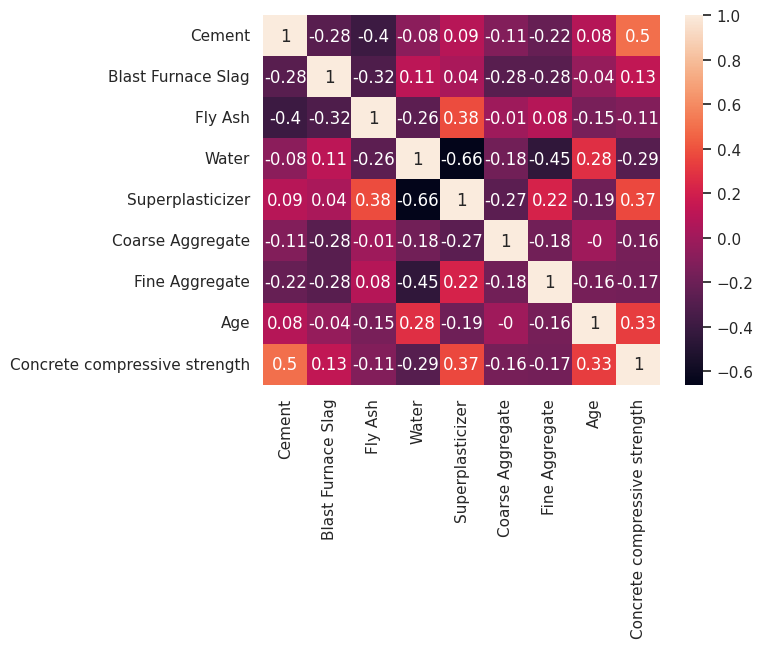

In [50]:
# Correlation Matrix

concrete_corr=concrete_df.corr().round(2)
sns.heatmap(data=concrete_corr, annot=True)
